In [1]:
import os
import sys

print("Current working directory:", os.getcwd())
parent_dir = os.path.dirname(os.getcwd())
if parent_dir not in sys.path:
    sys.path.insert(0, parent_dir)
    print(f"Added {parent_dir} to Python path")
else:
    print(f"{parent_dir} already in Python path")

Current working directory: /Users/jinceyang/Desktop/codebase/ml/learn_d2l/chap8
Added /Users/jinceyang/Desktop/codebase/ml/learn_d2l to Python path


In [2]:
import importlib
from matplotlib import pyplot as plt
import torch
import torch.nn as nn
import numpy as np

import importlib
from d2l.classification.model import VGGClassifier
from d2l.classification.dataset import FashionMNISTDataset
from d2l.base.trainer import Trainer
from d2l.base.evaluator import ClassificationEvaluator
from d2l.base.plot import plot_loss, plot_losses, show_images
from typing import List
from matplotlib import pyplot as plt
import torch
import numpy as np

from d2l.base.function import corr2d, corr2d_multi_in, corr2d_multi_in_out, corr2d_multi_in_out_1x1, comp_conv2d, max_pool2d, avg_pool2d

In [3]:
data = FashionMNISTDataset()

In [4]:
rng = torch.Generator().manual_seed(42)

In [5]:
vgg = VGGClassifier(
    num_outputs=10,
    rng=rng
)

In [6]:
vgg.init((10, 1, 28, 28))
vgg.layer_summary((10, 1, 28, 28))

            VGGBlock  input shape: torch.Size([10, 1, 28, 28])
            VGGBlock  output shape: torch.Size([10, 128, 14, 14])
            VGGBlock  input shape: torch.Size([10, 128, 14, 14])
            VGGBlock  output shape: torch.Size([10, 128, 7, 7])
             Flatten  input shape: torch.Size([10, 128, 7, 7])
             Flatten  output shape: torch.Size([10, 6272])
              Linear  input shape: torch.Size([10, 6272])
              Linear  output shape: torch.Size([10, 512])
                ReLU  input shape: torch.Size([10, 512])
                ReLU  output shape: torch.Size([10, 512])
             Dropout  input shape: torch.Size([10, 512])
             Dropout  output shape: torch.Size([10, 512])
              Linear  input shape: torch.Size([10, 512])
              Linear  output shape: torch.Size([10, 512])
                ReLU  input shape: torch.Size([10, 512])
                ReLU  output shape: torch.Size([10, 512])
             Dropout  input shape: torch.Siz

In [7]:
def eval_on_epoch(model, epoch_id, batch_losses):
    evaluator = ClassificationEvaluator(model)
    loss = evaluator.loss(data.get_test_dataloader(batch_size=data.test_size))
    print(f'Epoch {epoch_id}, validation loss {loss:.4f}')
    accuracy = evaluator.accuracy(data.get_test_dataloader(batch_size=data.test_size))
    print(f'Epoch {epoch_id}, validation accuracy {accuracy:.4f}')

In [8]:
trainer = Trainer(
    model=vgg,
    optimizer=torch.optim.Adam(vgg.net.parameters(), lr=0.001),
    on_train_epoch_end=eval_on_epoch
)

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch 0, validation loss 0.3502
Epoch 0, validation accuracy 0.8718


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch 1, validation loss 0.2728
Epoch 1, validation accuracy 0.9007


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch 2, validation loss 0.2459
Epoch 2, validation accuracy 0.9117


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch 3, validation loss 0.2237
Epoch 3, validation accuracy 0.9179


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch 4, validation loss 0.2175
Epoch 4, validation accuracy 0.9223


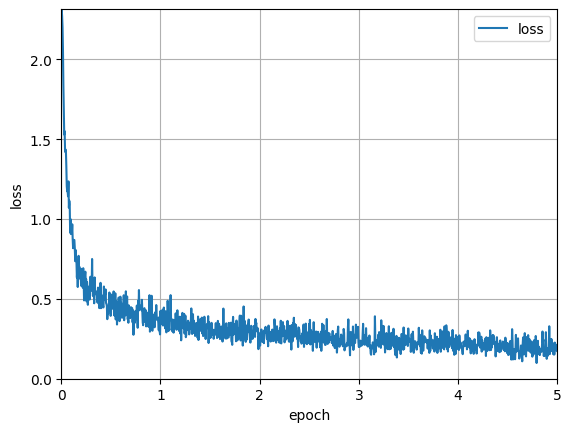

In [9]:
epoch_losses = trainer.train(
    data.get_train_dataloader_epochs(batch_size=256, num_epochs=5)
)
fig, ax = plt.subplots()
plot_loss(ax, epoch_losses)

In [10]:
evaluator = ClassificationEvaluator(vgg)
test_loss = evaluator.loss(data.get_test_dataloader(data.test_size))
print(f'Test loss: {test_loss:.4f}')
accuracy = evaluator.accuracy(data.get_test_dataloader(data.test_size))
print(f'Test accuracy: {accuracy:.2%}')

Test loss: 0.2175
Test accuracy: 92.23%


In [11]:
# save the model
vgg.save('vgg_fashion_mnist.pth')